In [47]:

import missingno as msno
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

In [48]:
!pip install missingno

In [49]:
	

path = "/Users/radhadevithambithurai/Downloads/Global Electronics/Customers.csv"
customer_dt=pd.read_csv(path,encoding='latin-1') #character encoding standard (like é, ö, etc.)
customer_dt.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [50]:

customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [51]:
# Check for missing values
print(customer_dt.isnull().sum())

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64


In [54]:

#Droping useless columns
customer_dt.drop(["State Code","Zip Code"],axis=1,inplace=True)
     



KeyError: "['State Code', 'Zip Code'] not found in axis"

In [82]:
	

# Remove duplicate rows
customer_dt.drop_duplicates(inplace=True)

In [55]:
# Convert Birthday column to datetime
customer_dt['Birthday'] = pd.to_datetime(customer_dt['Birthday'], format = '%m/%d/%Y')
customer_dt.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19


In [56]:
	

#checking null set and data types
customer_dt.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State        15266 non-null  object        
 5   Country      15266 non-null  object        
 6   Continent    15266 non-null  object        
 7   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 954.3+ KB


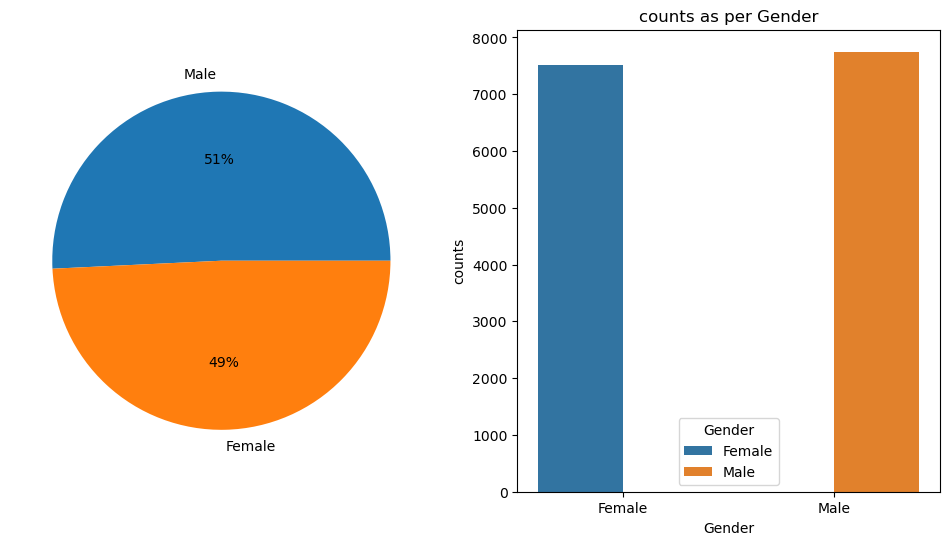

In [57]:

# visualize gender details
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(customer_dt["Gender"].value_counts(), autopct='%1.0f%%', labels=['Male', 'Female'])
plt.subplot(1,2,2)
sns.countplot(x= customer_dt["Gender"],data=customer_dt,hue="Gender")
plt.xlabel("Gender")
plt.ylabel("counts")
plt.title("counts as per Gender")
plt.show()

Text(0.5, 1.0, 'Counts as per Country')

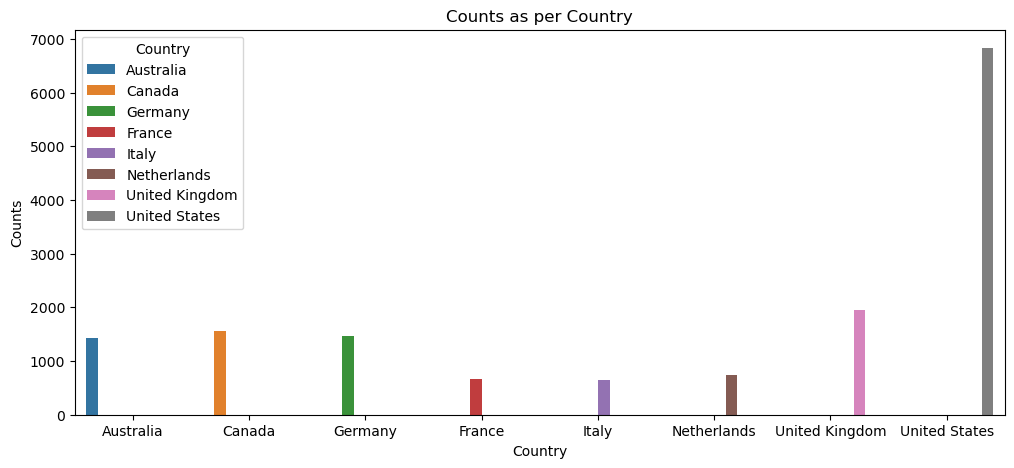

In [58]:

# visualize country counts
plt.figure(figsize=(12,5))
sns.countplot(x= customer_dt["Country"],data=customer_dt,hue="Country")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts as per Country")

EXCHANGE_RATES

In [59]:
df_exchange=pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Exchange_Rates.csv")
df_exchange


,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [60]:
# Check for missing values
print(df_exchange.isnull().sum())
# If there are missing values, decide on a strategy for handling them (e.g., drop rows, impute with mean/median).

# Summary statistics
print(df_exchange.describe())

# Check data types
print(df_exchange.dtypes)

Date        0
Currency    0
Exchange    0
dtype: int64
           Exchange
count  11215.000000
mean       1.061682
std        0.245519
min        0.628500
25%        0.857800
50%        1.000000
75%        1.311900
max        1.725300
Date         object
Currency     object
Exchange    float64
dtype: object


In [61]:

# Convert 'Date' column to datetime objects
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


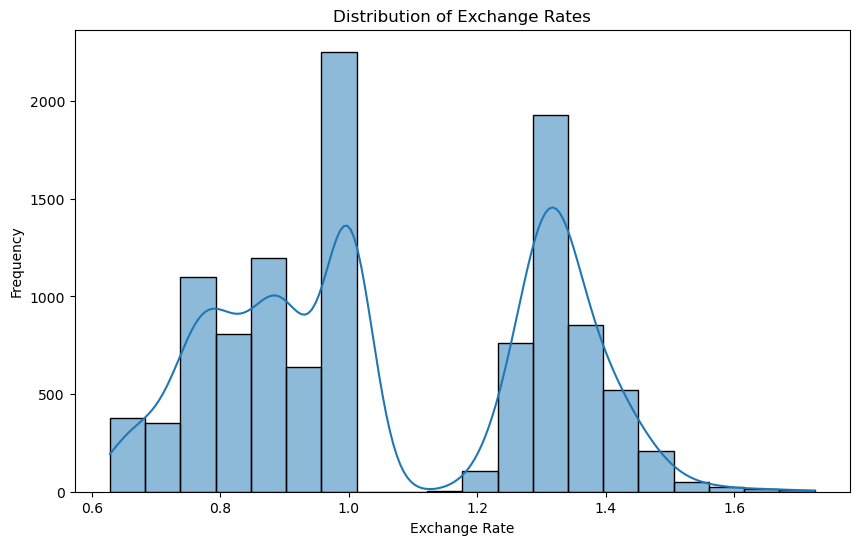

In [62]:

# Visualize the distribution of 'Exchange' rates
plt.figure(figsize=(10, 6))
sns.histplot(df_exchange['Exchange'], bins=20, kde=True)
plt.title('Distribution of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()
     

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


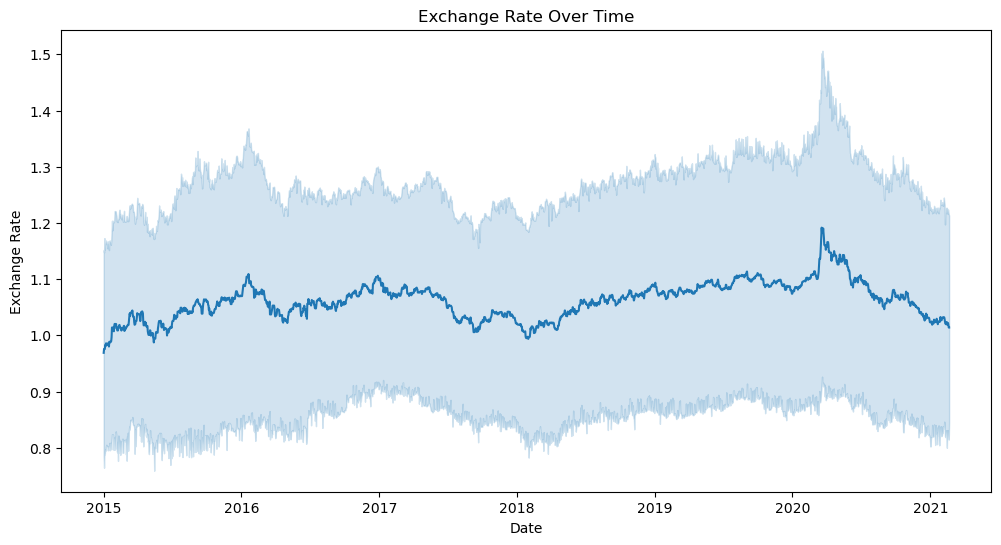

In [63]:

# Analyze the 'Exchange' rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Exchange', data=df_exchange)
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [64]:

df_products=pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Products.csv")
df_products
     

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [65]:
# Inspect the data
print(df_products.info())  # Get information about the dataframe
print(df_products.describe())  # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB
None
        ProductKey  SubcategoryKey  CategoryKey
count  2517.000000     2517.000000  2517.000000
mean   1259.000000      491.810091     4.878824
std     726.739637      229.887134     2.299170
min       1.000000      101.000000     1.000000
25%     630.000000      305.000000     3.000000
50%    1259.000000  

In [66]:

# Check for missing values in each column
print(df_products.isnull().sum())

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64


In [67]:
# Data Type Conversion
# Convert columns to the appropriate data types if needed
# Example: Convert 'Unit Cost USD' and 'Unit Price USD' to numeric type
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
df_products['Unit Price USD'] = df_products['Unit Price USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
     


In [68]:

# Remove Duplicates
# Check for duplicate rows and remove them if necessary
df_products.drop_duplicates(inplace=True)
     

In [69]:

df_products.drop(["SubcategoryKey"],axis=1,inplace=True)

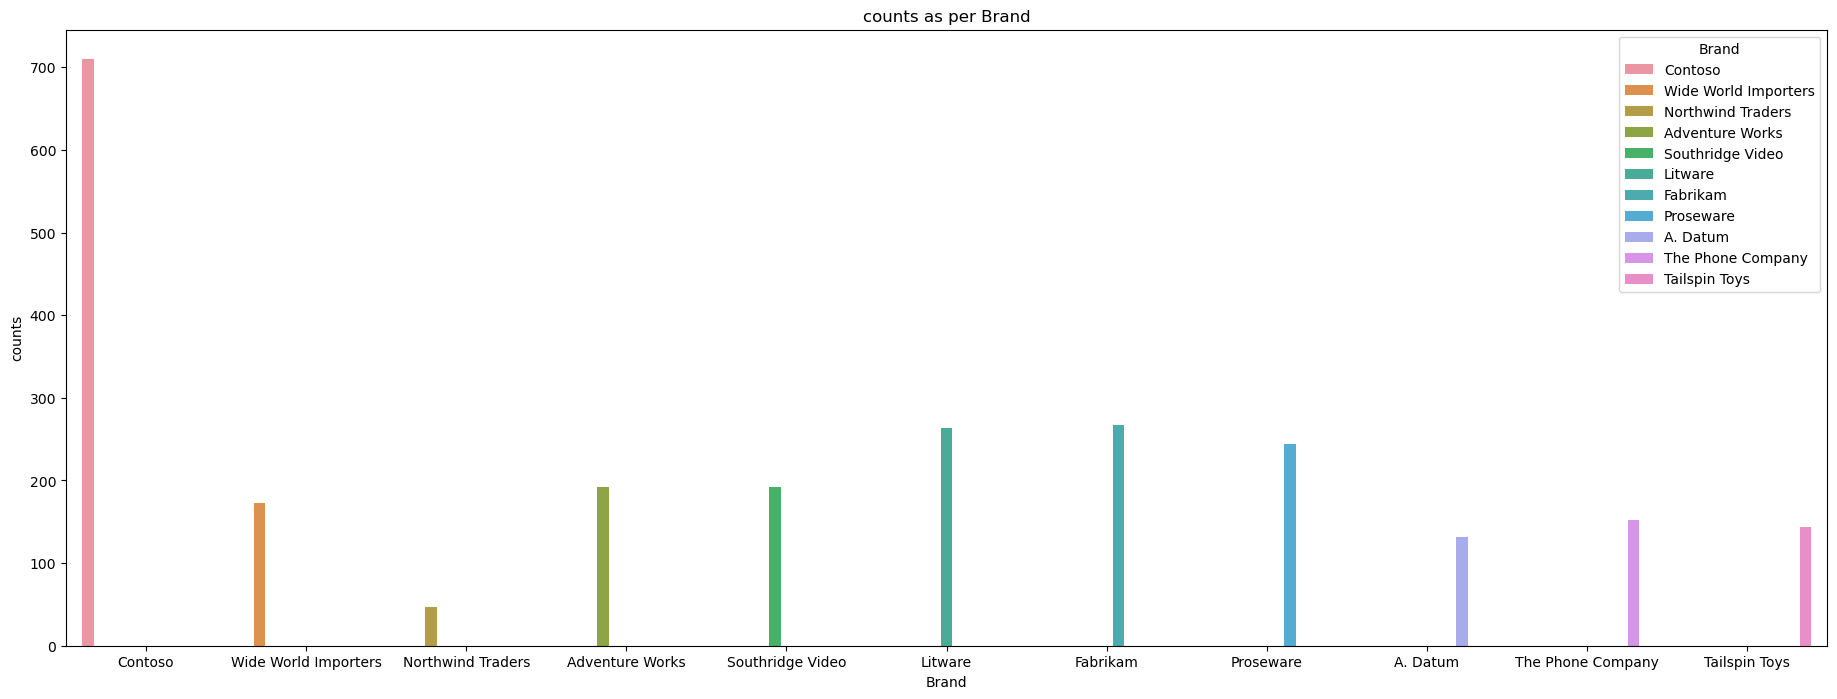

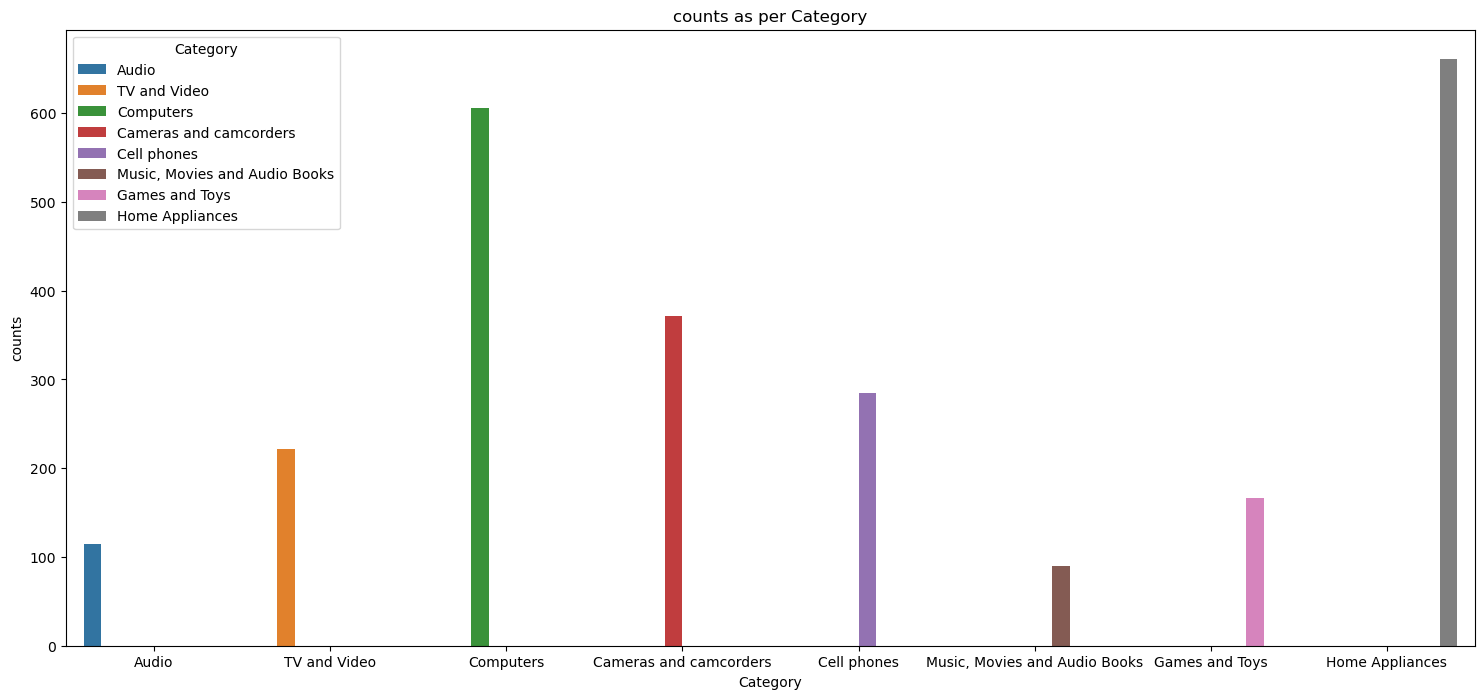

In [70]:

#visualize the brand and category
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
sns.countplot(x=df_products["Brand"],data=df_products,hue="Brand")
plt.xlabel("Brand")
plt.ylabel("counts")
plt.title("counts as per Brand")
plt.show()
plt.figure(figsize=(40,8))
plt.subplot(1,2,2)
sns.countplot(x=df_products["Category"],data=df_products,hue="Category")
plt.xlabel("Category")
plt.ylabel("counts")
plt.title("counts as per Category")
plt.show()

Sales

In [71]:
df_sales=pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Sales.csv")
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [72]:

# Get information about the dataframe, including data types and missing values
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB
None


In [101]:
# Generate descriptive statistics for numerical columns
print(df_sales.describe())

       Order Number     Line Item   CustomerKey      StoreKey    ProductKey  \
count  6.288400e+04  62884.000000  6.288400e+04  62884.000000  62884.000000   
mean   1.430905e+06      2.164207  1.180797e+06     31.802144   1125.859344   
std    4.532963e+05      1.365170  5.859634e+05     22.978188    709.244010   
min    3.660000e+05      1.000000  3.010000e+02      0.000000      1.000000   
25%    1.121017e+06      1.000000  6.808580e+05      8.000000    437.000000   
50%    1.498016e+06      2.000000  1.261200e+06     37.000000   1358.000000   
75%    1.788010e+06      3.000000  1.686496e+06     53.000000   1650.000000   
max    2.243032e+06      7.000000  2.099937e+06     66.000000   2517.000000   

           Quantity  
count  62884.000000  
mean       3.144790  
std        2.256371  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        4.000000  
max       10.000000  


In [73]:
	

# Check for missing values in each column
print(df_sales.isnull().sum())

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64


In [74]:

# Convert 'Order Date' column to datetime objects
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])

In [75]:
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'], format="%m/%d/%Y", errors='coerce').dt.date
     

In [76]:
	

# fill the missing values
df_sales["Delivery Date"]=df_sales["Delivery Date"].fillna(0)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


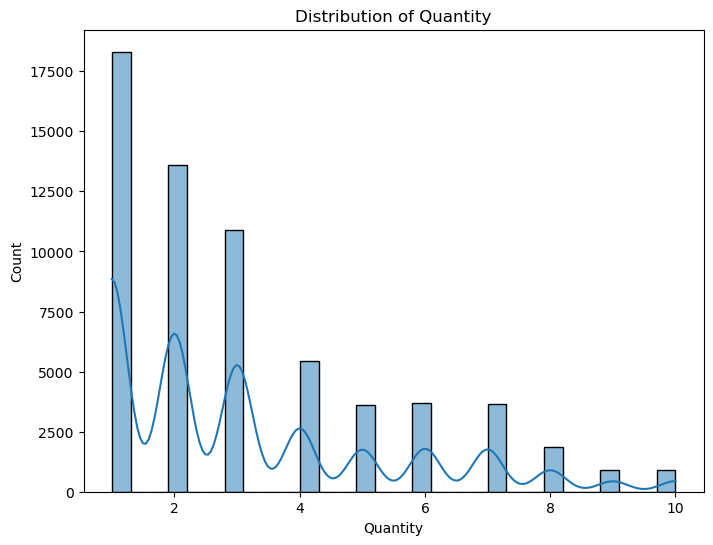

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


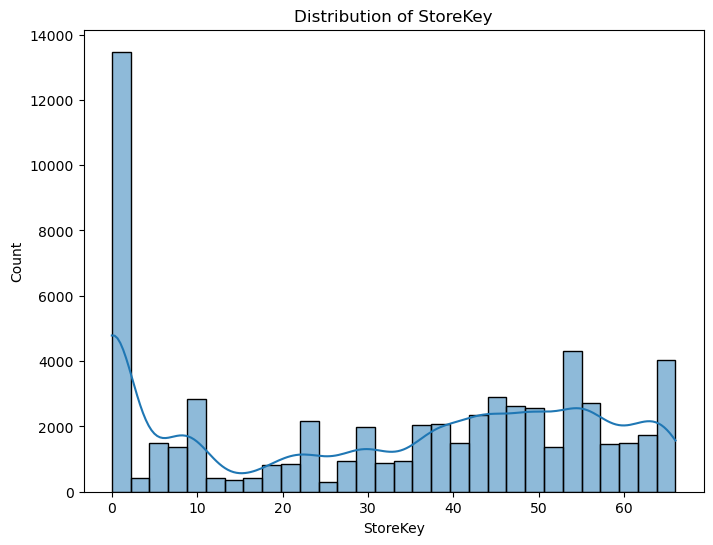

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


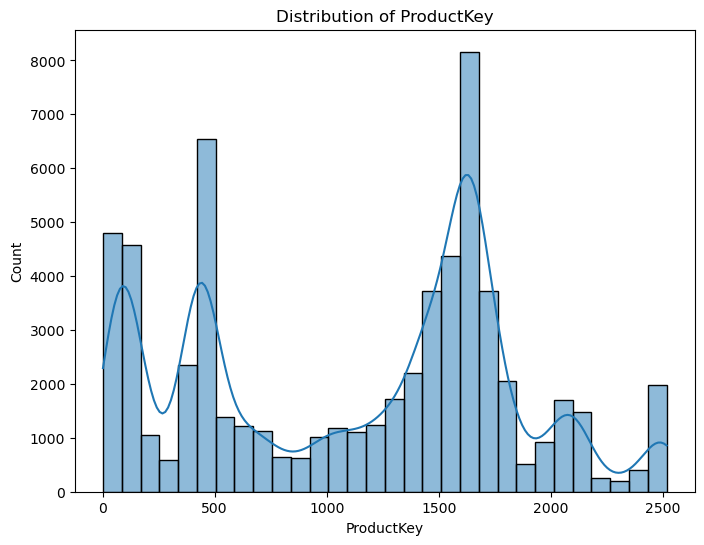

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


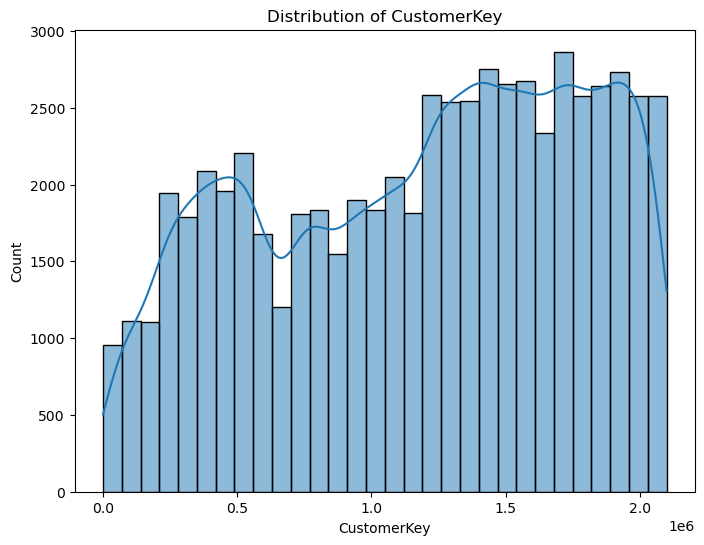

In [77]:
# Explore distributions of numerical features
numerical_features = ['Quantity', 'StoreKey', 'ProductKey', 'CustomerKey']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_sales[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [78]:

# Check for duplicates
print(df_sales.duplicated().sum())

0


Stores

In [79]:
df_stores=pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Stores.csv")
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [80]:

# Display basic information about the dataframe
print(df_stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB
None


In [81]:
# Check for missing values
print(df_stores.isnull().sum())
     

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64


In [82]:

# Data Cleaning
# Convert 'Open Date' to datetime objects
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'])

In [83]:

df_stores.fillna(0)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [113]:

# Remove duplicate rows (if any)
df_stores.drop_duplicates(inplace=True)
     

In [84]:
# My SQL connection

In [141]:

    #import libraries
import mysql.connector
import pandas as pd
import numpy as np
    

In [142]:
from sqlalchemy import create_engine

In [143]:
!pip install SQLAlchemy

In [144]:
	
#sql connection
mydb=mysql.connector.connect(host="localhost", user="root", password="Raymond@17", database="data_spark")
my_cursor = mydb.cursor()
my_cursor.execute("CREATE DATABASE IF NOT EXISTS data_spark")
print("database created successfully")

database created successfully


In [145]:
#function to reconnect in case of any connection issue
def reconnect():
    global mydb, my_cursor
    mydb = mysql.connector.connect(
        host = "localhost",
        user = "root",
        password = "Raymond@17",
        database = "data_spark"
    )
my_cursor = mydb.cursor()

In [146]:
df_customers = pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Customers.csv", encoding='latin1') 
df_exchange_rates = pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Exchange_Rates.csv")
df_products = pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Products.csv")
df_stores = pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Stores.csv")
df_sales = pd.read_csv("/Users/radhadevithambithurai/Downloads/Global Electronics/Sales.csv")

In [147]:
#customer table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS customers(
                  CustomerKey INT(64),
                  Gender VARCHAR(255),
                  Name VARCHAR(255),
                  City VARCHAR(255),
                  State VARCHAR(255),
                  Country VARCHAR(255),
                  Continent VARCHAR(255),
                  Birthday DATE
                  )''')
print("Table Created successfully")


Table Created successfully


In [166]:
import numpy as np

# Fix NaNs
df_customers = df_customers.replace({np.nan: None})

# Convert Birthday to proper date
df_customers['Birthday'] = pd.to_datetime(df_customers['Birthday'], errors='coerce').dt.date

# Ensure column order matches SQL table
df_customers = df_customers[['CustomerKey', 'Gender', 'Name', 'City', 'State', 'Country', 'Continent', 'Birthday']]

data = df_customers.values.tolist()

insert_query = '''INSERT INTO customers(
                    CustomerKey, Gender, Name, City, State, Country, Continent, Birthday)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s)'''

batch_size = 1000
for i in range(0, len(data), batch_size):
    batch_data = data[i:i + batch_size]
    print(f"Inserting batch {i // batch_size + 1}, size: {len(batch_data)}")
    try:
        my_cursor.executemany(insert_query, batch_data)
        mydb.commit()
    except mysql.connector.Error as err:
        print("Error:", err)
        if err.errno in (mysql.connector.errorcode.CR_SERVER_LOST,
                         mysql.connector.errorcode.CR_SERVER_GONE_ERROR):
            reconnect()
            my_cursor.executemany(insert_query, batch_data)
            mydb.commit()

Inserting batch 1, size: 1000
Inserting batch 2, size: 1000
Inserting batch 3, size: 1000
Inserting batch 4, size: 1000
Inserting batch 5, size: 1000
Inserting batch 6, size: 1000
Inserting batch 7, size: 1000
Inserting batch 8, size: 1000
Inserting batch 9, size: 1000
Inserting batch 10, size: 1000
Inserting batch 11, size: 1000
Inserting batch 12, size: 1000
Inserting batch 13, size: 1000
Inserting batch 14, size: 1000
Inserting batch 15, size: 1000
Inserting batch 16, size: 266


In [151]:
my_cursor.execute("SHOW COLUMNS FROM customers")
print(my_cursor.fetchall())

[('CustomerKey', 'int', 'YES', '', None, ''), ('Gender', 'varchar(255)', 'YES', '', None, ''), ('Name', 'varchar(255)', 'YES', '', None, ''), ('City', 'varchar(255)', 'YES', '', None, ''), ('State', 'varchar(255)', 'YES', '', None, ''), ('Country', 'varchar(255)', 'YES', '', None, ''), ('Continent', 'varchar(255)', 'YES', '', None, ''), ('Birthday', 'date', 'YES', '', None, '')]


In [194]:
# Ensure correct types
df_exchange_rates['Date'] = pd.to_datetime(df_exchange_rates['Date']).dt.date
df_exchange_rates['Currency_Code'] = df_exchange_rates['Currency_Code'].astype(str)
df_exchange_rates['Exchange'] = pd.to_numeric(df_exchange_rates['Exchange'], errors='coerce')

In [195]:
df_exchange_rates.rename(columns={'Currency': 'Currency_Code'}, inplace=True)

In [196]:
# exchange_rates table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_rates(
                  Date DATE,
                  Currency_Code VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

# insert values into exchange_rates table
insert_query ='''INSERT INTO exchange_rates(
                  Date,
                  Currency_Code,
                  Exchange)
                  VALUES (%s, %s, %s)'''
data=df_exchange_rates.values.tolist()
batch_size = 1000  # Adjust this value as needed

for i in range(0, len(data), batch_size):
    batch_data = data[i:i + batch_size]
    try:
        # Performing batch insert with executemany()
        my_cursor.executemany(insert_query, batch_data)
        mydb.commit()
    except mysql.connector.Error as err:
        if err.errno == mysql.connector.errorcode.CR_SERVER_LOST or err.errno == mysql.connector.errorcode.CR_SERVER_GONE_ERROR:
            reconnect()
            my_cursor.executemany(insert_query, batch_data)
            mydb.commit()
print("Inserted successfully")

Table Created successfully
Inserted successfully


In [201]:
print(len(df_exchange_rates))

11215


In [ ]:
# create Products table 
my_cursor.execute('''CREATE TABLE IF NOT EXISTS products(
                  ProductKey INT(64),
                  Product_Name VARCHAR(255),
                  Brand VARCHAR(255),
                  Color VARCHAR(255),
                  Unit_Cost_USD FLOAT,
                  Unit_Price_USD FLOAT,
                  Subcategory VARCHAR(255),
                  CategoryKey INT(64),
                  Category VARCHAR(255)
                  )''')
print("Table Created successfully")



Table Created successfully
Inserted successfully


In [202]:
print(df_products.shape)
print(df_products.head())

(2517, 10)
   ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   
3           4    Contoso 2G MP3 Player E200 Silver  Contoso  Silver   
4           5       Contoso 2G MP3 Player E200 Red  Contoso     Red   

  Unit Cost USD Unit Price USD  SubcategoryKey Subcategory  CategoryKey  \
0        $6.62         $12.99              101     MP4&MP3            1   
1        $6.62         $12.99              101     MP4&MP3            1   
2        $7.40         $14.52              101     MP4&MP3            1   
3       $11.00         $21.57              101     MP4&MP3            1   
4       $11.00         $21.57              101     MP4&MP3            1   

  Category  
0    Audio  
1    Audio  
2    Audio  
3    Audio  
4    Audio  


In [205]:
df_products.rename(columns={
    'Product Name': 'Product_Name',
    'Unit Cost USD': 'Unit_Cost_USD',
    'Unit Price USD': 'Unit_Price_USD'
}, inplace=True)

In [206]:
expected_columns = ['ProductKey', 'Product_Name', 'Brand', 'Color', 
                    'Unit_Cost_USD', 'Unit_Price_USD', 'Subcategory', 
                    'CategoryKey', 'Category']
df_products = df_products[expected_columns]

In [207]:
df_products['Unit_Cost_USD'] = df_products['Unit_Cost_USD'].replace('[\$,]', '', regex=True).astype(float)
df_products['Unit_Price_USD'] = df_products['Unit_Price_USD'].replace('[\$,]', '', regex=True).astype(float)

/var/folders/8y/8zdtx5tj4_d1ndx8khgnywlm0000gn/T/ipykernel_1233/4202852833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['Unit_Cost_USD'] = df_products['Unit_Cost_USD'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/8y/8zdtx5tj4_d1ndx8khgnywlm0000gn/T/ipykernel_1233/4202852833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['Unit_Price_USD'] = df_products['Unit_Price_USD'].replace('[\$,]', '', regex=True).astype(float)


In [208]:
# Clean & rename
df_products.rename(columns={
    'Product Name': 'Product_Name',
    'Unit Cost USD': 'Unit_Cost_USD',
    'Unit Price USD': 'Unit_Price_USD'
}, inplace=True)

# Clean dollar signs and convert to float
df_products['Unit_Cost_USD'] = df_products['Unit_Cost_USD'].replace('[\$,]', '', regex=True).astype(float)
df_products['Unit_Price_USD'] = df_products['Unit_Price_USD'].replace('[\$,]', '', regex=True).astype(float)

# Select required columns
expected_columns = ['ProductKey', 'Product_Name', 'Brand', 'Color', 
                    'Unit_Cost_USD', 'Unit_Price_USD', 'Subcategory', 
                    'CategoryKey', 'Category']
df_products = df_products[expected_columns]

# Prepare data
data = df_products.values.tolist()
batch_size = 1000

insert_query ='''INSERT INTO products(
                  ProductKey,
                  Product_Name,
                  Brand,
                  Color,
                  Unit_Cost_USD,
                  Unit_Price_USD,
                  Subcategory,
                  CategoryKey,
                  Category)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'''

# Insert in batches
for i in range(0, len(data), batch_size):
    batch_data = data[i:i + batch_size]
    try:
        my_cursor.executemany(insert_query, batch_data)
        mydb.commit()
        print(f"Inserted batch {i // batch_size + 1}")
    except mysql.connector.Error as err:
        if err.errno in (mysql.connector.errorcode.CR_SERVER_LOST,
                         mysql.connector.errorcode.CR_SERVER_GONE_ERROR):
            reconnect()  # your reconnect function
            my_cursor.executemany(insert_query, batch_data)
            mydb.commit()
        else:
            print(f"Error in batch {i // batch_size + 1}: {err}")
print("All product data inserted successfully.")

Inserted batch 1
Inserted batch 2
Inserted batch 3
All product data inserted successfully.


/var/folders/8y/8zdtx5tj4_d1ndx8khgnywlm0000gn/T/ipykernel_1233/3867035781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products.rename(columns={
/var/folders/8y/8zdtx5tj4_d1ndx8khgnywlm0000gn/T/ipykernel_1233/3867035781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['Unit_Cost_USD'] = df_products['Unit_Cost_USD'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/8y/8zdtx5tj4_d1ndx8khgnywlm0000gn/T/ipykernel_1233/3867035781.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [154]:
#sales table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales(
                  Order_Number INT(64),
                  Line_Item INT(64),
                  Order_Date DATE,
                  Delivery_Date DATE,
                  CustomerKey INT(64),
                  StoreKey INT(64),
                  ProductKey INT(64),
                  Quantity INT(64),
                  Currency_Code VARCHAR(255)
                  )''')
print("Table Created successfully")

#insert values into sales table
insert_query ='''INSERT INTO sales(
                  Order_Number,
                  Line_Item,
                  Order_Date,
                  Delivery_Date,
                  CustomerKey,
                  StoreKey,
                  ProductKey,
                  Quantity,
                  Currency_Code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
data=df_sales.values.tolist()
batch_size = 1000  # Adjust this value as needed

for i in range(0, len(data), batch_size):
    batch_data = data[i:i + batch_size]
    try:
        # Performing batch insert with executemany()
        my_cursor.executemany(insert_query, batch_data)
        mydb.commit()
    except mysql.connector.Error as err:
        if err.errno == mysql.connector.errorcode.CR_SERVER_LOST or err.errno == mysql.connector.errorcode.CR_SERVER_GONE_ERROR:
            reconnect()
            my_cursor.executemany(insert_query, batch_data)
            mydb.commit()
print("Inserted successfully")

Table Created successfully
Inserted successfully


In [209]:
print(df_sales.head())
print(df_sales.dtypes)

   Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1   1/1/2016           NaN       265598        10   
1        366001          1   1/1/2016     1/13/2016      1269051         0   
2        366001          2   1/1/2016     1/13/2016      1269051         0   
3        366002          1   1/1/2016     1/12/2016       266019         0   
4        366002          2   1/1/2016     1/12/2016       266019         0   

   ProductKey  Quantity Currency Code  
0        1304         1           CAD  
1        1048         2           USD  
2        2007         1           USD  
3        1106         7           CAD  
4         373         1           CAD  
Order Number      int64
Line Item         int64
Order Date       object
Delivery Date    object
CustomerKey       int64
StoreKey          int64
ProductKey        int64
Quantity          int64
Currency Code    object
dtype: object


In [210]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], errors='coerce')
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'], errors='coerce')

In [211]:
print(data[0])

[1, 'Contoso 512MB MP3 Player E51 Silver', 'Contoso', 'Silver', 6.62, 12.99, 'MP4&MP3', 1, 'Audio']


In [213]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], errors='coerce').dt.date
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'], errors='coerce').dt.date

In [215]:
# Ensure correct formats before inserting
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], errors='coerce').dt.date
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'], errors='coerce').dt.date

insert_query ='''INSERT INTO sales(
                  Order_Number,
                  Line_Item,
                  Order_Date,
                  Delivery_Date,
                  CustomerKey,
                  StoreKey,
                  ProductKey,
                  Quantity,
                  Currency_Code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'''

data = df_sales.values.tolist()
batch_size = 1000

for i in range(0, len(data), batch_size):
    batch_data = data[i:i + batch_size]
    try:
        my_cursor.executemany(insert_query, batch_data)
        mydb.commit()
    except mysql.connector.Error as err:
        print(f"Error at batch {i}: {err}")
        if err.errno in [mysql.connector.errorcode.CR_SERVER_LOST, mysql.connector.errorcode.CR_SERVER_GONE_ERROR]:
            reconnect()
            my_cursor.executemany(insert_query, batch_data)
            mydb.commit()

print("Inserted successfully")

Inserted successfully


In [216]:
my_cursor.execute("SELECT COUNT(*) FROM sales")
print("Total rows in sales table:", my_cursor.fetchone()[0])

# Sample data
my_cursor.execute("SELECT * FROM sales LIMIT 5")
rows = my_cursor.fetchall()
for row in rows:
    print(row)

Total rows in sales table: 125768
(366000, 1, datetime.date(2016, 1, 1), datetime.date(1, 1, 1), 265598, 10, 1304, 1, 'CAD')
(366001, 1, datetime.date(2016, 1, 1), datetime.date(2016, 1, 13), 1269051, 0, 1048, 2, 'USD')
(366001, 2, datetime.date(2016, 1, 1), datetime.date(2016, 1, 13), 1269051, 0, 2007, 1, 'USD')
(366002, 1, datetime.date(2016, 1, 1), datetime.date(2016, 1, 12), 266019, 0, 1106, 7, 'CAD')
(366002, 2, datetime.date(2016, 1, 1), datetime.date(2016, 1, 12), 266019, 0, 373, 1, 'CAD')


In [241]:
#store table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS stores(
                  StoreKey INT,
                  Country VARCHAR(255),
                  State VARCHAR(255),
                  Square_Meters FLOAT,
                  Open_Date DATE
                  )''')
print("Table Created successfully")

df_stores.fillna(0)  
##insert values into Store table
insert_query ='''INSERT INTO stores(
                  StoreKey,
                  Country,
                  State,
                  Square_Meters,
                  Open_Date)
                  VALUES (%s, %s, %s, %s, %s)'''
data=df_stores.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Table Created successfully


ProgrammingError: 1054 (42S22): Unknown column 'nan' in 'field list'

In [244]:
df_stores = df_stores.fillna({
    'StoreKey': 0,
    'Country': 'Unknown',
    'State': 'Unknown',
    'Square_Meters': 0,
    'Open_Date': None  # or a default date
})

In [245]:
data = df_stores.where(pd.notnull(df_stores), None).values.tolist()

In [250]:
# Fill missing values
df_stores = df_stores.fillna({
    'StoreKey': 0,
    'Country': 'Unknown',
    'State': 'Unknown',
    'Square_Meters': 0,
    'Open_Date': None
})

# Convert NaN to None explicitly (if any still remain)
data = df_stores.where(pd.notnull(df_stores), None).values.tolist()

# Prepare insert query
insert_query = '''
    INSERT INTO stores(
        StoreKey,
        Country,
        State,
        Square_Meters,
        Open_Date
    ) VALUES (%s, %s, %s, %s, %s)
'''

# Execute batch insert
my_cursor.executemany(insert_query, data)
my_db.commit()
print("Inserted successfully")


ProgrammingError: 1054 (42S22): Unknown column 'nan' in 'field list'

In [248]:
import math

# For example, check first row for nan
print(any(math.isnan(x) if isinstance(x, float) else False for x in data[0]))

False


In [249]:
import numpy as np

# Replace np.nan with None (Python null)
data = [
    tuple(None if (isinstance(x, float) and np.isnan(x)) else x for x in row)
    for row in df_stores.values.tolist()
]

In [225]:
df_stores['Open_Date'] = pd.to_datetime(df_stores['Open_Date'], errors='coerce').dt.date

In [220]:
print(df_stores.columns.tolist())

['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date']


In [218]:
df_stores = df_stores.fillna(0)

In [221]:
df_stores.columns = df_stores.columns.str.strip().str.replace(' ', '_').str.title()
print(df_stores.columns.tolist())

['Storekey', 'Country', 'State', 'Square_Meters', 'Open_Date']


In [222]:
df_stores['Open_Date'] = pd.to_datetime(df_stores['Open_Date'], errors='coerce').dt.date

In [223]:
# Clean columns
df_stores.columns = df_stores.columns.str.strip().str.replace(' ', '_').str.title()

# Check column names
print("Columns:", df_stores.columns.tolist())

# Fill missing values
df_stores = df_stores.fillna(0)

# Convert Open_Date to proper format
df_stores['Open_Date'] = pd.to_datetime(df_stores['Open_Date'], errors='coerce').dt.date

Columns: ['Storekey', 'Country', 'State', 'Square_Meters', 'Open_Date']


In [226]:
df_stores['Open_Date'] = pd.to_datetime(df_stores['Open_Date'], errors='coerce').dt.date
print(df_stores['Open_Date'].head())

0    2008-01-01
1    2008-01-12
2    2012-01-07
3    2010-01-01
4    2015-12-09
Name: Open_Date, dtype: object


In [227]:
my_cursor.execute("SELECT * FROM stores LIMIT 5")
rows = my_cursor.fetchall()
for row in rows:
    print(row)

(1, 'Australia', 'Australian Capital Territory', 595.0, datetime.date(2008, 1, 1))
(2, 'Australia', 'Northern Territory', 665.0, datetime.date(2008, 1, 12))
(3, 'Australia', 'South Australia', 2000.0, datetime.date(2012, 1, 7))
(4, 'Australia', 'Tasmania', 2000.0, datetime.date(2010, 1, 1))
(5, 'Australia', 'Victoria', 2000.0, datetime.date(2015, 12, 9))


In [230]:
# Clean and prepare df_stores
df_stores.columns = df_stores.columns.str.strip().str.replace(' ', '_').str.title()
df_stores = df_stores.fillna(0)
df_stores['Open_Date'] = pd.to_datetime(df_stores['Open_Date'], errors='coerce').dt.date

# Reorder columns just in case
df_stores = df_stores[['StoreKey', 'Country', 'State', 'Square_Meters', 'Open_Date']]

# Convert to list of tuples
data = df_stores.values.tolist()

# Insert into MySQL
insert_query = '''
    INSERT INTO stores (
        StoreKey,
        Country,
        State,
        Square_Meters,
        Open_Date
    ) VALUES (%s, %s, %s, %s, %s)
'''

my_cursor.executemany(insert_query, data)
mydb.commit()  # <-- required!
print("Inserted successfully")

# Confirm from DB
my_cursor.execute("SELECT * FROM stores LIMIT 5")
rows = my_cursor.fetchall()
for row in rows:
    print(row)

KeyError: "['StoreKey'] not in index"

In [231]:
df_stores = df_stores[['StoreKey', 'Country', 'State', 'Square_Meters', 'Open_Date']]

KeyError: "['StoreKey'] not in index"

In [232]:
print(df_stores.columns)

Index(['Storekey', 'Country', 'State', 'Square_Meters', 'Open_Date'], dtype='object')


In [233]:
# Strip whitespace from column names
df_stores.columns = df_stores.columns.str.strip()

# Optional: print cleaned column names
print(df_stores.columns.tolist())

['Storekey', 'Country', 'State', 'Square_Meters', 'Open_Date']


In [234]:
df_stores.rename(columns={'storekey': 'StoreKey'}, inplace=True)

In [237]:
required_columns = ['StoreKey', 'Country', 'State', 'Square_Meters', 'Open_Date']
missing = [col for col in required_columns if col not in df_stores.columns]

if missing:
    print(f"Missing columns: {missing}")
else:
    df_stores = df_stores[required_columns]

Missing columns: ['StoreKey']


In [239]:
print(df_stores.columns.tolist())

['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date']


In [240]:
# Suppose the column is 'store_key' instead of 'StoreKey'
df_stores.rename(columns={'store_key': 'StoreKey'}, inplace=True)